# **Bank Marketing**

# 1. Load Dataset

In [169]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
data = pd.read_csv('bank_marketing.csv')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# 2. Data Exploration

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [172]:
# Check for missing values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [173]:
# data.drop('Unnamed: 0', axis=1, inplace=True)
# data.isna().sum()

In [174]:
# Check Duplicate values
data.duplicated().sum()

12

In [175]:
# drop duplicate values
data.drop_duplicates(inplace=True)

In [176]:
data['y'] = data['y'].map({'yes':1, 'no':0})

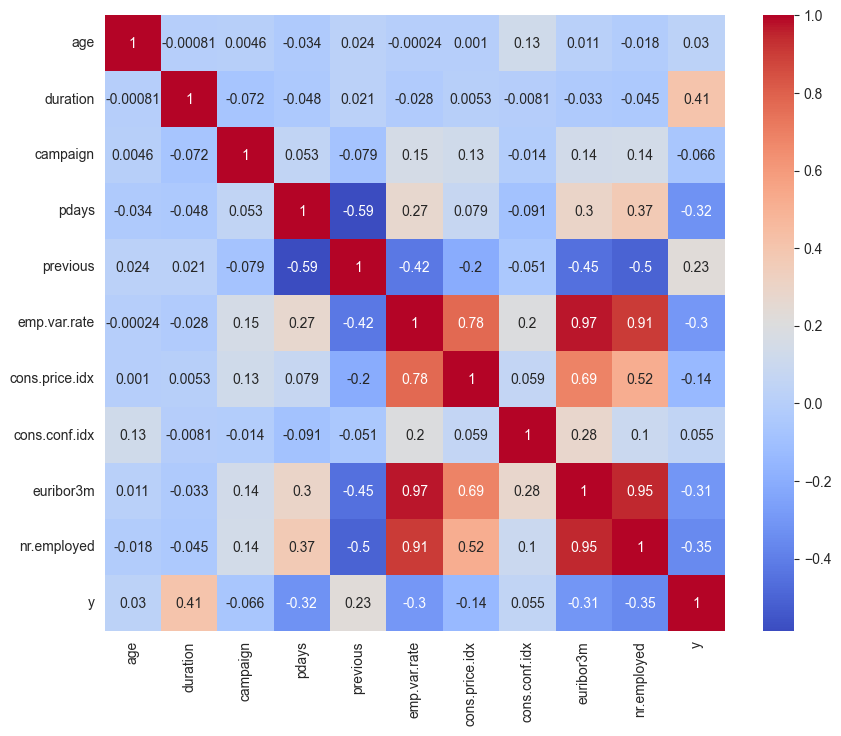

In [177]:
# Draw heatmap to check correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 3. Exploratory Data Analysis

## **3.1. Categorical Variables**
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome

In [130]:
# categorical variable
data.select_dtypes(include='object')

job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome  
0      telephone   may         mon  nonexistent  
1      telephone   may         mon  nonexistent  
2      telephone   may         mon  nonexistent  
3      telephone   may         mon  nonexistent  
4      telephone   may         mon  nonexistent  
...          ...   ...         ...          ...  
41183   cellular   nov         fri  nonexistent  
41184   cellular   nov         fri  nonexistent  
41185   cellular   nov         fri  nonexistent  
41186   cellular   nov         fri  nonexistent  
41187   cellular   nov         fri      failure  

[41176 rows x 10 columns]

In [131]:
data.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [132]:
data.select_dtypes(include='object').describe().T

count unique                top   freq
job          41176     12             admin.  10419
marital      41176      4            married  24921
education    41176      8  university.degree  12164
default      41176      3                 no  32577
housing      41176      3                yes  21571
loan         41176      3                 no  33938
contact      41176      2           cellular  26135
month        41176     10                may  13767
day_of_week  41176      5                thu   8618
poutcome     41176      3        nonexistent  35551

In [178]:
data.drop(['day_of_week', 'month', 'contact'], axis=1, inplace=True)

## Target Variable (y)
## Is The Client Will Subscribe to Deposit or Not ?!

In [139]:
data.y.value_counts(normalize=True)*100

0    88.733728
1    11.266272
Name: y, dtype: float64

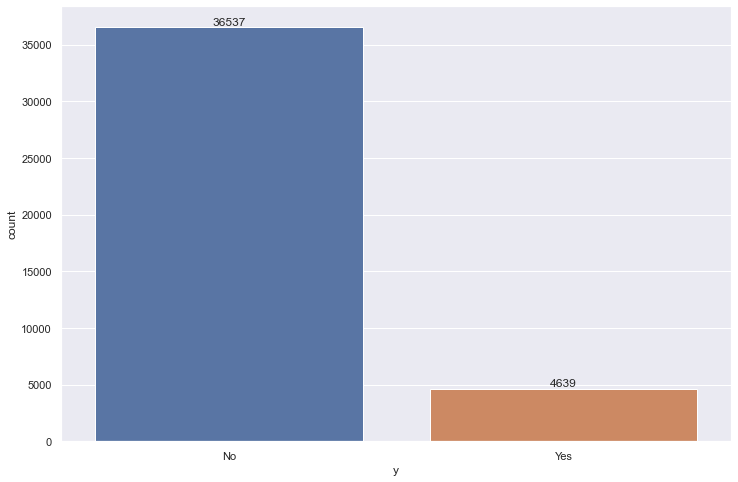

In [135]:
# Barplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.y.map({0:'No', 1:'Yes'}), data=data)
ax.bar_label(ax.containers[0])

plt.show()

- Subscribe Acceptence almost 11 % :( 

In [138]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='y', title='Deposit Acceptence Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Job


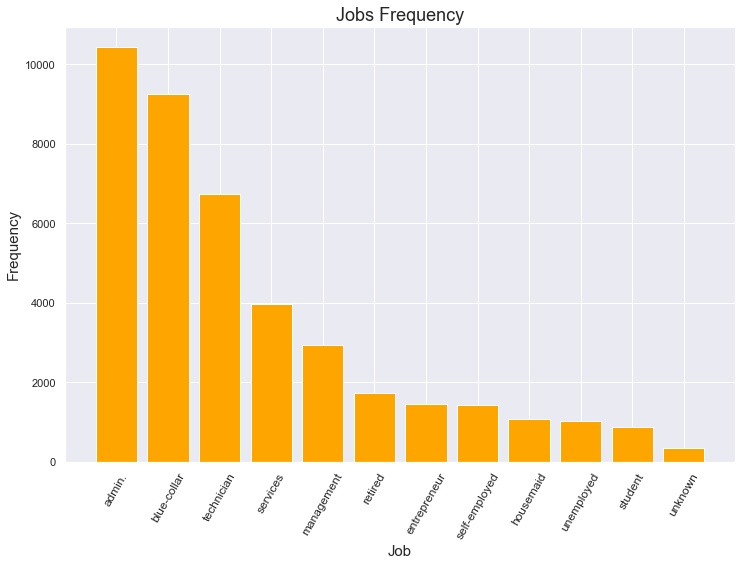

In [63]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['job'].value_counts().index, data['job'].value_counts(), color='Orange')
plt.xlabel('Job', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Jobs Frequency', fontsize=18)
plt.show()


In [57]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='job', title='Jobs Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Admin and Blue-Collar are the most frequency Jobs!!

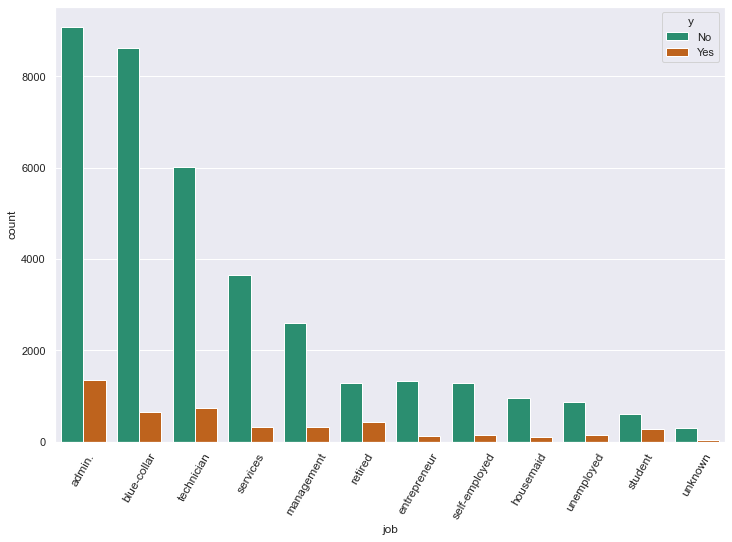

In [174]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data.job, hue=data.y.map({0:'No', 1:'Yes'}), data=data, palette='Dark2', order=data.job.value_counts().index)
plt.xticks(rotation=60, fontsize=12)
plt.show()

## marital

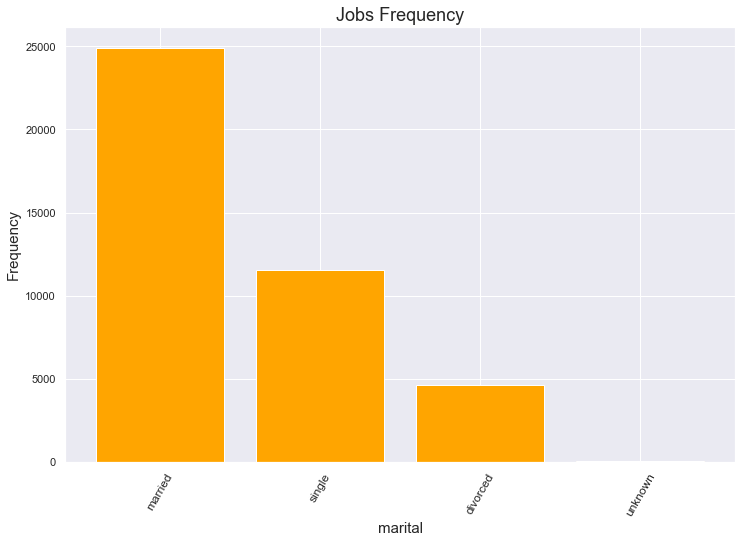

In [68]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['marital'].value_counts().head(10).index, data['marital'].value_counts().head(10), color='Orange')
plt.xlabel('marital', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Jobs Frequency', fontsize=18)
plt.show()


In [71]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='marital', title='marital Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


- Married is almost double compared to single

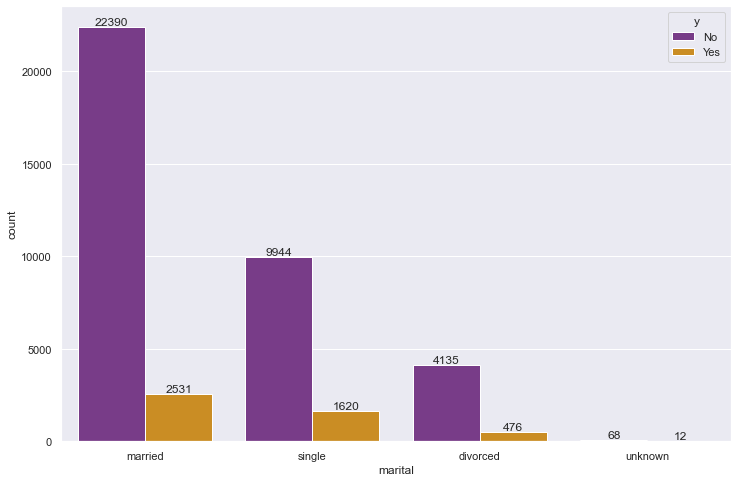

In [172]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.marital, hue=data.y.map({0:'No', 1:'Yes'}), data=data, palette='CMRmap', order=data.marital.value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

--- 

In [145]:
data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

## Education 

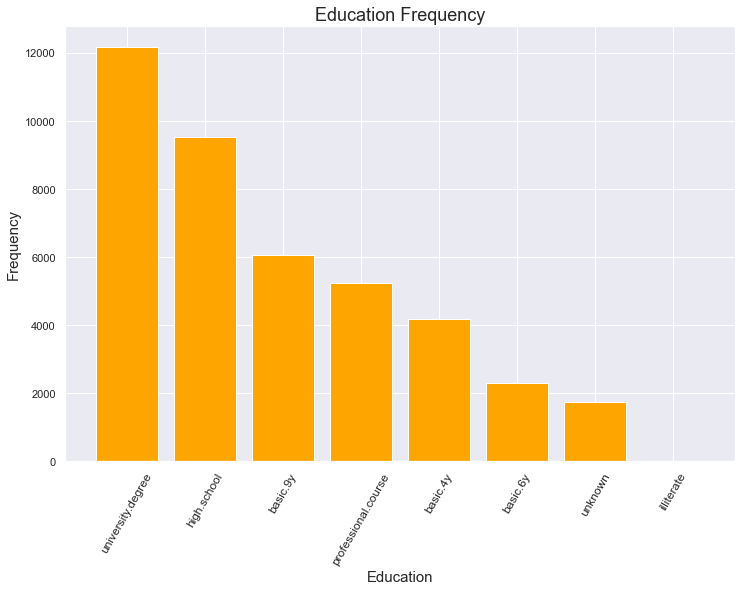

In [146]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['education'].value_counts().head(10).index, data['education'].value_counts().head(10), color='Orange')
plt.xlabel('Education', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Education Frequency', fontsize=18)
plt.show()


In [147]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='education', title='Education Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- University Degree and high School are the most frequency Education Categories

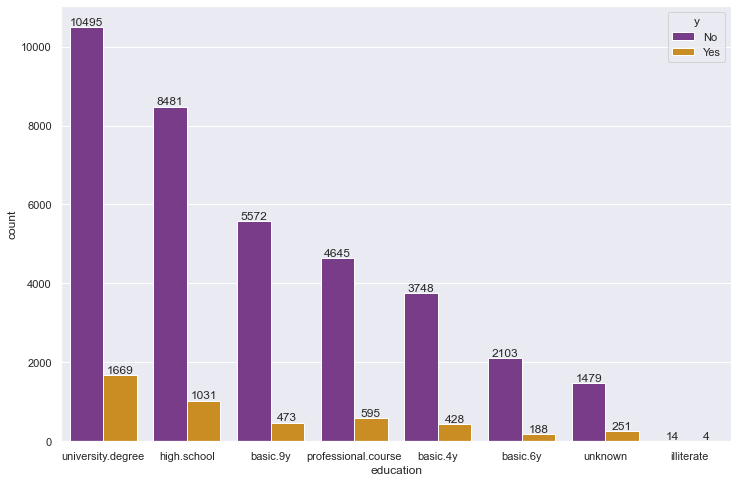

In [171]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.education, hue=data.y.map({0:'No', 1:'Yes'}), data=data, palette='CMRmap', order=data.education.value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## Default 
has credit in default? (categorical: 'no', 'yes', 'unknown')

In [202]:
data.default.value_counts(normalize=True)*100

no         79.116476
unknown    20.876239
yes         0.007286
Name: default, dtype: float64

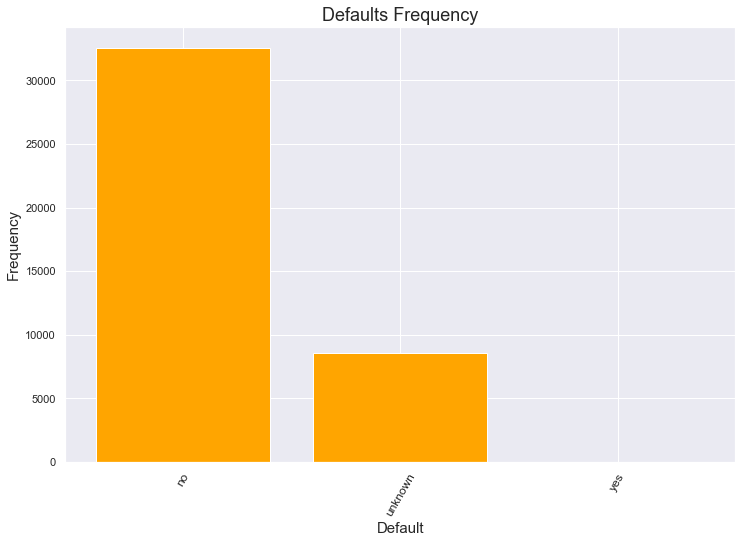

In [199]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['default'].value_counts().head(10).index, data['default'].value_counts().head(10), color='Orange')
plt.xlabel('Default', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Defaults Frequency', fontsize=18)
plt.show()


In [203]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='default', title='Default Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Most of Clients does not have credit Card

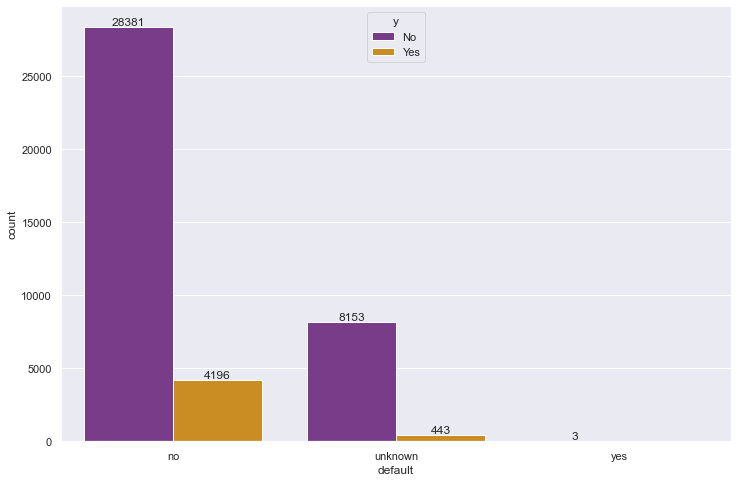

In [212]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.default, hue=data.y.map({0:'No', 1:'Yes'}), data=data, palette='CMRmap', order=data.default.value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## Housing
has housing loan? (categorical: 'no', 'yes', 'unknown')

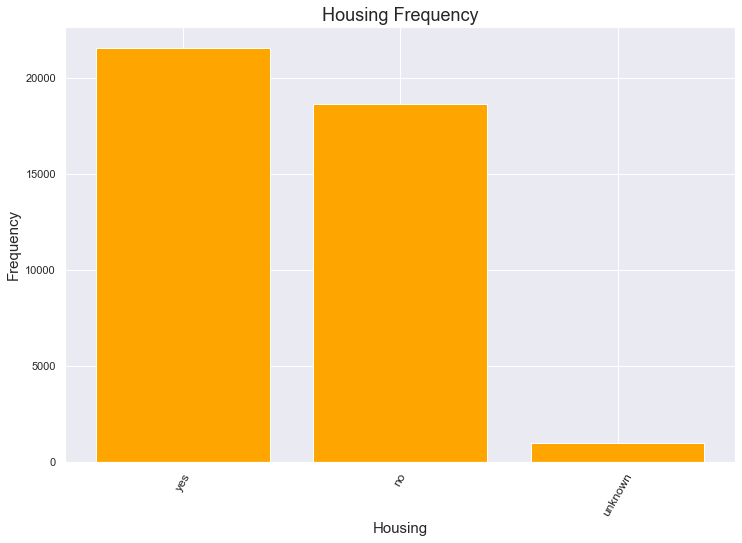

In [204]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['housing'].value_counts().head(10).index, data['housing'].value_counts().head(10), color='Orange')
plt.xlabel('Housing', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Housing Frequency', fontsize=18)
plt.show()


In [205]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='housing', title='Housing Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Approximatly half of clients have housing loan

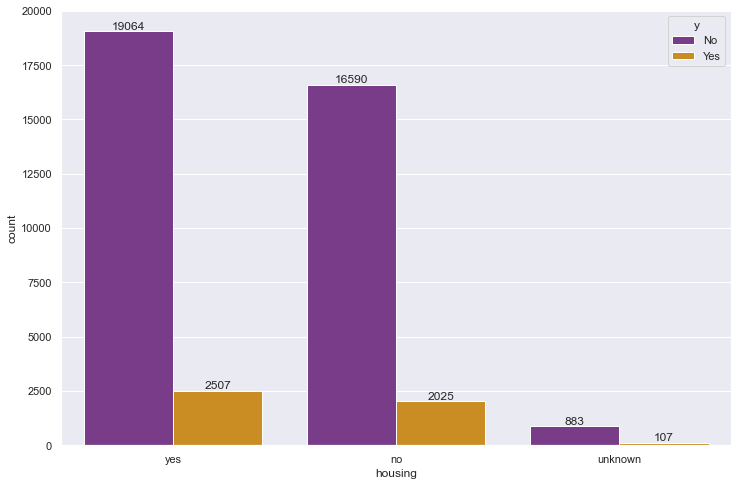

In [213]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.housing, hue=data.y.map({0:'No', 1:'Yes'}), data=data, palette='CMRmap', order=data.housing.value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## Loan
has personal loan? (categorical: 'no', 'yes', 'unknown')

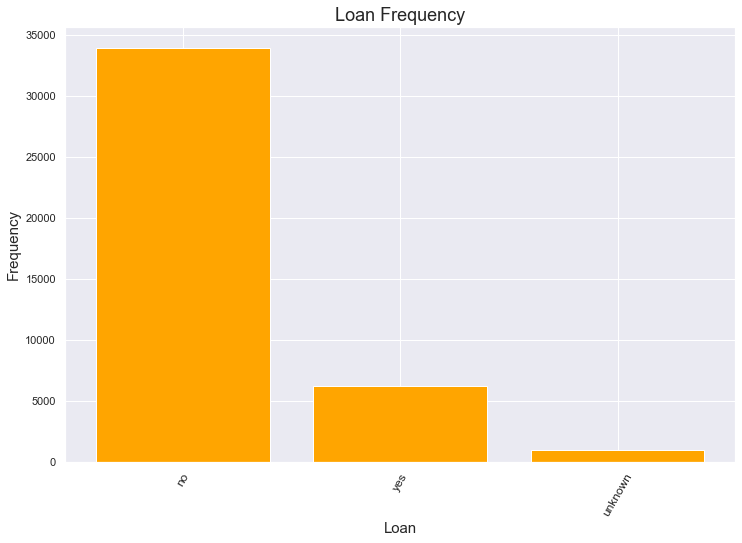

In [206]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['loan'].value_counts().head(10).index, data['loan'].value_counts().head(10), color='Orange')
plt.xlabel('Loan', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Loan Frequency', fontsize=18)
plt.show()


In [207]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='loan', title='Loan Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- only 15 % of clients have personal loan

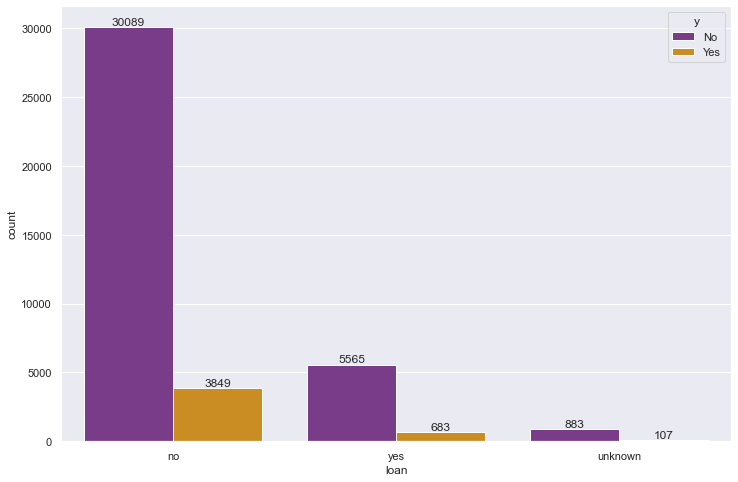

In [214]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.loan, hue=data.y.map({0:'No', 1:'Yes'}), data=data, palette='CMRmap', order=data.loan.value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## Contact

In [209]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='contact', title='contact Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Poutcome
outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

In [210]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='poutcome', title='poutcome Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

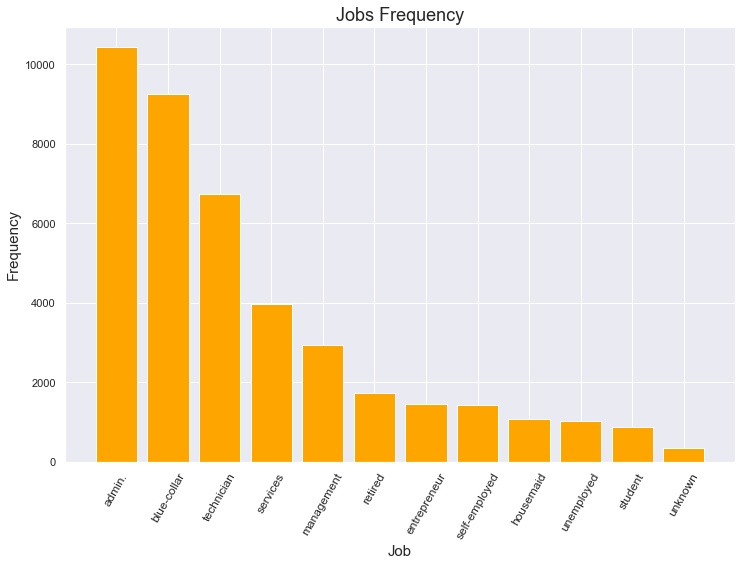

In [ ]:
# Barplot
plt.figure(figsize=(12, 8))
plt.bar(data['job'].value_counts().index, data['job'].value_counts(), color='Orange')
plt.xlabel('Job', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.title('Jobs Frequency', fontsize=18)
plt.show()


In [ ]:
# pie chart 
import plotly.express as px
fig = px.pie(data, names='job', title='Jobs Frequency')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [51]:
import warnings
warnings.filterwarnings('ignore')

## **3.2. Numerical Variables**
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed
- y

In [7]:
data.select_dtypes(exclude='object').describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [113]:
4918 // 60 // 60

1

In [91]:
# Functions to plot Numerical variables
def plot_numerical(col):
    plt.figure(figsize=(30, 8))
    
    # Distribution plot
    plt.subplot(1, 3, 1) 
    sns.distplot(data[col], color='blue')

    # Boxplot
    plt.subplot(1, 3, 2)
    plt.title(col.upper(), fontsize=18)
    sns.boxplot(data[col], color='red')

    # Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(data[col], bins=10, color='Orange')
    plt.show()

## Age

In [89]:
data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

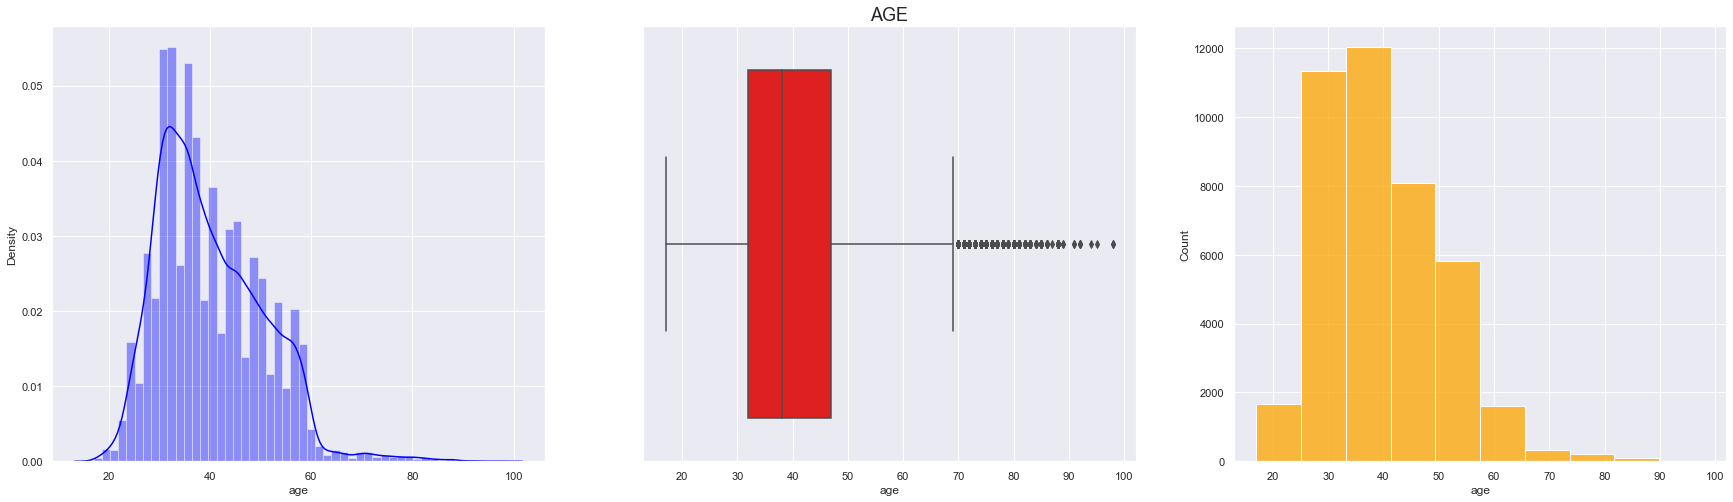

In [114]:
plot_numerical('age')

In [98]:
# Percentage of outliers
(data['age'][data['age'] > 70].count()/data.shape[0])*100

1.0245702631834515

- The majority of clients are between 30 and 50 years old
- There are outliers in age 
- Percentage of outliers = 1.0 %

## Duration (last contact duration, in seconds)  --> See it again

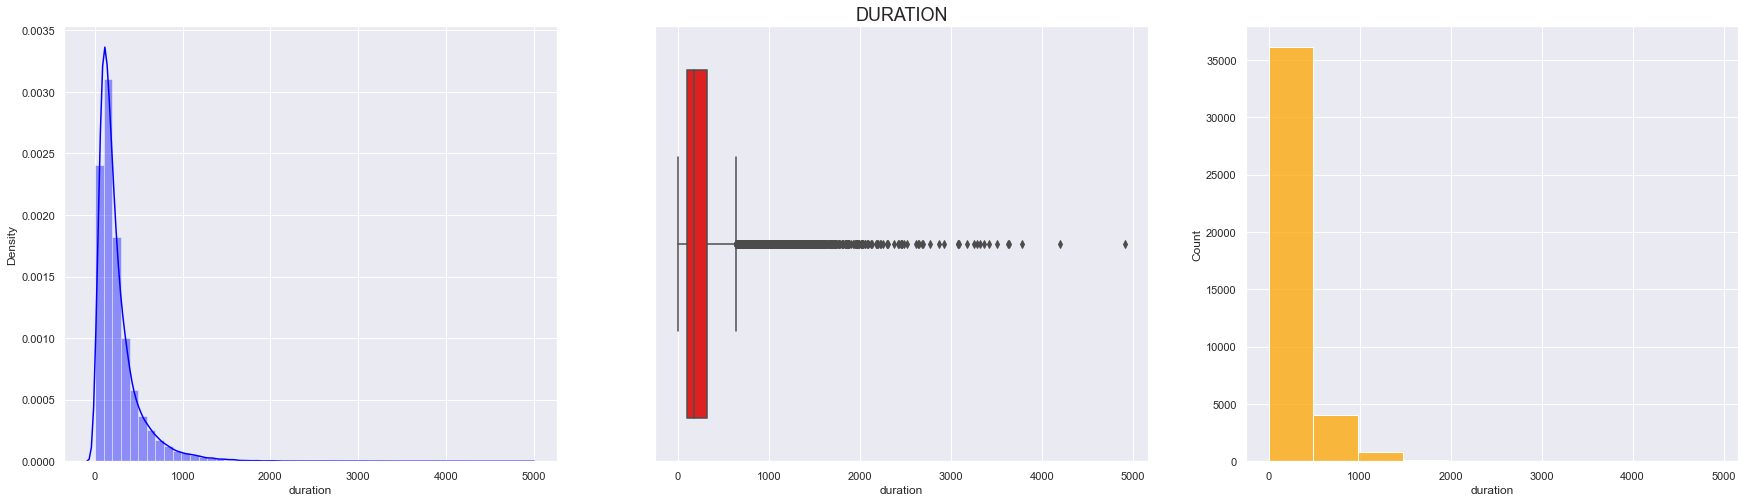

In [115]:
plot_numerical('duration')

## Campaign: number of contacts performed during this campaign and for this client

In [119]:
data.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [124]:
data.campaign.value_counts(ascending=False)

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

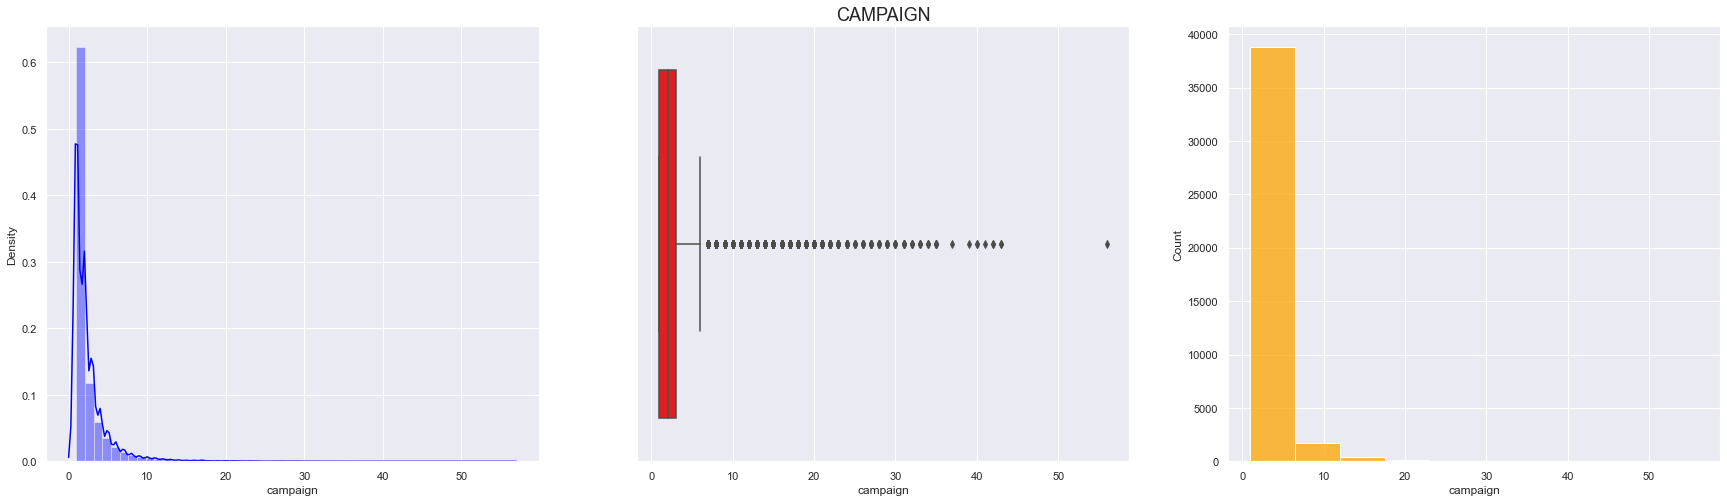

In [120]:
plot_numerical('campaign')

# 4. Data Preprocessing

## **4.1 Categorical Variable Encodeing**

![Alt text](image.png)

In [159]:
data.select_dtypes(include='object').head(5)

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [180]:
# one hot encoding
y = data['y']
data = pd.get_dummies(data, drop_first=True)
data.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  education_university.degree  \
0          -36.4      4.857       5191.0  ...                            0   
1          -36.4      4.857       5191.0  ...                            0   
2          -36.4      4.857       5191.0  ...                            0   
3          -36.4      4.857       5191.0  ...                            0   
4          -36.4      4.857       5191.0  ...                            0   

   education_unknown  default_unknown  default_yes  housing_unknown  \
0                  0                0            0                0   
1                  0                1            0                0   
2                  0                0            0                0   
3                  0                0            0                0   
4                  0                0            0                0   

   housing_yes  loan_unknown  loan_yes  poutcome_nonexistent  poutcome_success  
0            0             0         0                     1                 0  
1            0             0         0                     1                 0  
2            1             0         0                     1                 0  
3            0             0         0                     1                 0  
4            0             0         1                     1                 0  

[5 rows x 40 columns]

## **4.2 Numerical Variable Standrdization**

In [195]:
# Standardization
from sklearn.preprocessing import StandardScaler
data2 = data.copy()


In [196]:
scaler = StandardScaler()
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'poutcome_nonexistent', 'poutcome_success']

X = scaler.fit_transform(data2.drop('y', axis=1))
X = pd.DataFrame(X, columns=cols)

In [221]:
X

age  duration  campaign     pdays  previous  emp.var.rate  \
0      1.533143  0.010352 -0.565963  0.195443 -0.349551      0.648101   
1      1.629107 -0.421577 -0.565963  0.195443 -0.349551      0.648101   
2     -0.290177 -0.124626 -0.565963  0.195443 -0.349551      0.648101   
3     -0.002284 -0.413864 -0.565963  0.195443 -0.349551      0.648101   
4      1.533143  0.187751 -0.565963  0.195443 -0.349551      0.648101   
...         ...       ...       ...       ...       ...           ...   
41171  3.164534  0.291876 -0.565963  0.195443 -0.349551     -0.752402   
41172  0.573501  0.480845 -0.565963  0.195443 -0.349551     -0.752402   
41173  1.533143 -0.267317 -0.204990  0.195443 -0.349551     -0.752402   
41174  0.381573  0.708379 -0.565963  0.195443 -0.349551     -0.752402   
41175  3.260499 -0.074492  0.155984  0.195443  1.670821     -0.752402   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
0            0.722628       0.886568   0.712463     0.331695  ...   
1            0.722628       0.886568   0.712463     0.331695  ...   
2            0.722628       0.886568   0.712463     0.331695  ...   
3            0.722628       0.886568   0.712463     0.331695  ...   
4            0.722628       0.886568   0.712463     0.331695  ...   
...               ...            ...        ...          ...  ...   
41171        2.058076      -2.225059  -1.495197    -2.815689  ...   
41172        2.058076      -2.225059  -1.495197    -2.815689  ...   
41173        2.058076      -2.225059  -1.495197    -2.815689  ...   
41174        2.058076      -2.225059  -1.495197    -2.815689  ...   
41175        2.058076      -2.225059  -1.495197    -2.815689  ...   

       education_university.degree  education_unknown  default_unknown  \
0                        -0.647514          -0.209422        -0.513656   
1                        -0.647514          -0.209422         1.946827   
2                        -0.647514          -0.209422        -0.513656   
3                        -0.647514          -0.209422        -0.513656   
4                        -0.647514          -0.209422        -0.513656   
...                            ...                ...              ...   
41171                    -0.647514          -0.209422        -0.513656   
41172                    -0.647514          -0.209422        -0.513656   
41173                     1.544367          -0.209422        -0.513656   
41174                    -0.647514          -0.209422        -0.513656   
41175                    -0.647514          -0.209422        -0.513656   

       default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
0        -0.008536        -0.156957    -1.048943     -0.156957 -0.422945   
1        -0.008536        -0.156957    -1.048943     -0.156957 -0.422945   
2        -0.008536        -0.156957     0.953341     -0.156957 -0.422945   
3        -0.008536        -0.156957    -1.048943     -0.156957 -0.422945   
4        -0.008536        -0.156957    -1.048943     -0.156957  2.364375   
...            ...              ...          ...           ...       ...   
41171    -0.008536        -0.156957     0.953341     -0.156957 -0.422945   
41172    -0.008536        -0.156957    -1.048943     -0.156957 -0.422945   
41173    -0.008536        -0.156957     0.953341     -0.156957 -0.422945   
41174    -0.008536        -0.156957    -1.048943     -0.156957 -0.422945   
41175    -0.008536        -0.156957     0.953341     -0.156957 -0.422945   

       poutcome_nonexistent  poutcome_success  
0                  0.397773         -0.185728  
1                  0.397773         -0.185728  
2                  0.397773         -0.185728  
3                  0.397773         -0.185728  
4                  0.397773         -0.185728  
...                     ...               ...  
41171              0.397773         -0.185728  
41172              0.397773         -0.185728  
41173              0.397773         -0.185728  
41174              0.397

In [222]:
y = data['y']

In [223]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [200]:
# # Normalization
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X = scaler.fit_transform(data2.drop('y', axis=1))
# X = pd.DataFrame(X, columns=cols)
# X

## **4.3. Split Data**

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32940, 39)
X_test shape: (8236, 39)
y_train shape: (32940,)
y_test shape: (8236,)


## **4.4. Balancing Data using SMOTE**

In [226]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [227]:
print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(X_smote))

print('Original test dataset shape', len(X_test_smote))
print('Resampled test dataset shape', len(y_test_smote))

Original dataset shape 32940
Resampled dataset shape 58544
Original test dataset shape 14530
Resampled test dataset shape 14530


In [230]:
y_smote.value_counts()

0    29272
1    29272
Name: y, dtype: int64

In [229]:
y_test_smote.value_counts()

1    7265
0    7265
Name: y, dtype: int64

--- 

# 5. Artifical Neural Network 

In [231]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers

In [232]:
X_smote.shape[1]

39

In [233]:
# model_1 "Basic Model"
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_smote.shape[1], )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2560      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [234]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [235]:
history = model.fit(X_smote, y_smote, epochs=50, batch_size=64, validation_data=(X_test_smote, y_test_smote))

Epoch 1/50
915/915 [==============================] - 3s 2ms/step - loss: 0.3184 - acc: 0.8669 - val_loss: 0.3187 - val_acc: 0.8731
Epoch 2/50
915/915 [==============================] - 2s 2ms/step - loss: 0.2703 - acc: 0.8907 - val_loss: 0.3138 - val_acc: 0.8756
Epoch 3/50
915/915 [==============================] - 2s 2ms/step - loss: 0.2576 - acc: 0.8968 - val_loss: 0.3097 - val_acc: 0.8772
Epoch 4/50
915/915 [==============================] - 2s 2ms/step - loss: 0.2461 - acc: 0.9029 - val_loss: 0.3256 - val_acc: 0.8692
Epoch 5/50
915/915 [==============================] - 2s 3ms/step - loss: 0.2364 - acc: 0.9069 - val_loss: 0.3447 - val_acc: 0.8648
Epoch 6/50
915/915 [==============================] - 3s 3ms/step - loss: 0.2272 - acc: 0.9120 - val_loss: 0.3331 - val_acc: 0.8727
Epoch 7/50
915/915 [==============================] - 2s 2ms/step - loss: 0.2201 - acc: 0.9161 - val_loss: 0.3450 - val_acc: 0.8694
Epoch 8/50
915/915 [==============================] - 2s 2ms/step - loss: 0.

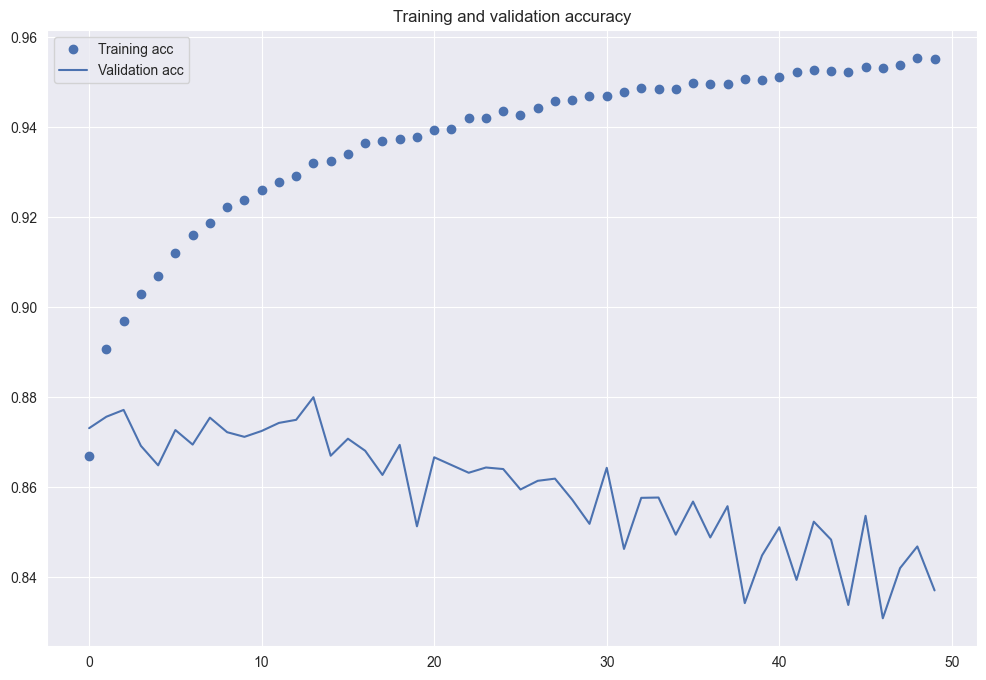

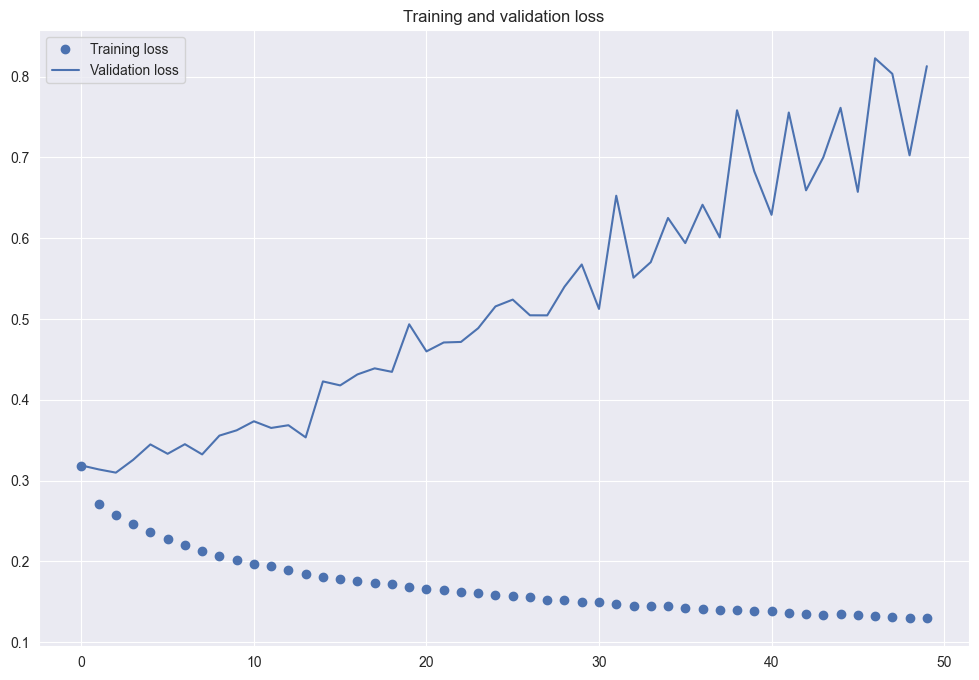

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- **There is a highly Overfitting**

## **Try to Handle Overfitting!!**

## **Regularization**

In [241]:
# Handling Overfitting
from keras import regularizers

model_2 = Sequential()
model_2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_smote.shape[1], )))
model_2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                2560      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [242]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [243]:
history = model_2.fit(X_smote, y_smote, epochs=50, batch_size=64, validation_data=(X_test_smote, y_test_smote))

Epoch 1/50
915/915 [==============================] - 69s 7ms/step - loss: 0.4024 - acc: 0.8650 - val_loss: 0.3727 - val_acc: 0.8736
Epoch 2/50
915/915 [==============================] - 7s 7ms/step - loss: 0.3286 - acc: 0.8878 - val_loss: 0.3467 - val_acc: 0.8735
Epoch 3/50
915/915 [==============================] - 6s 6ms/step - loss: 0.3072 - acc: 0.8932 - val_loss: 0.3405 - val_acc: 0.8759
Epoch 4/50
915/915 [==============================] - 6s 6ms/step - loss: 0.2948 - acc: 0.8957 - val_loss: 0.3315 - val_acc: 0.8783
Epoch 5/50
915/915 [==============================] - 6s 6ms/step - loss: 0.2868 - acc: 0.8979 - val_loss: 0.3357 - val_acc: 0.8766
Epoch 6/50
915/915 [==============================] - 5s 6ms/step - loss: 0.2798 - acc: 0.9010 - val_loss: 0.3275 - val_acc: 0.8756
Epoch 7/50
915/915 [==============================] - 5s 6ms/step - loss: 0.2744 - acc: 0.9028 - val_loss: 0.3273 - val_acc: 0.8772
Epoch 8/50
915/915 [==============================] - 5s 5ms/step - loss: 0

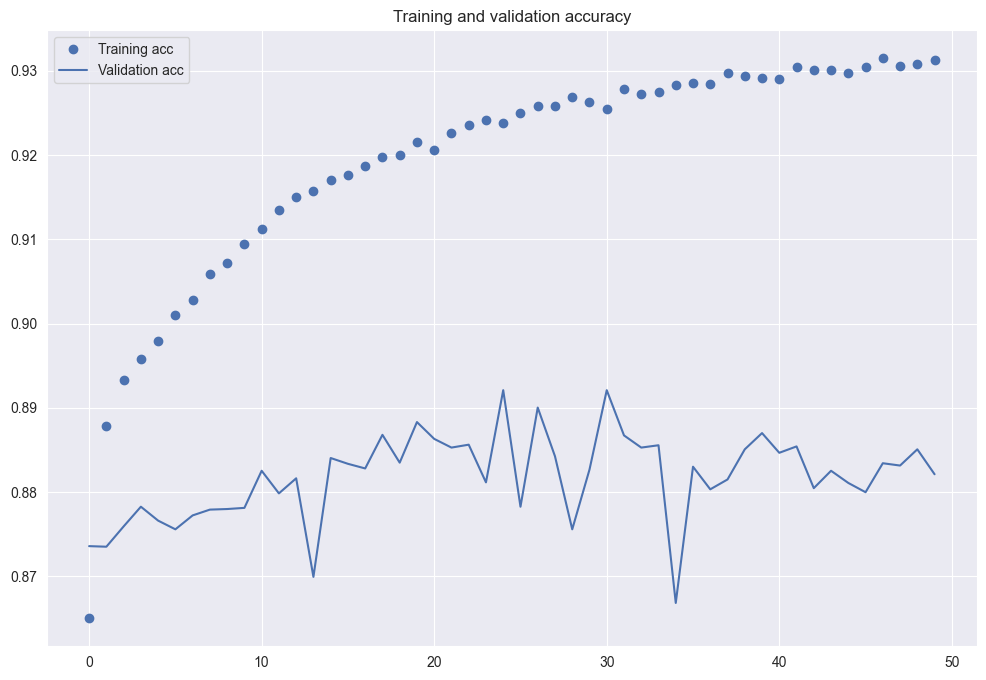

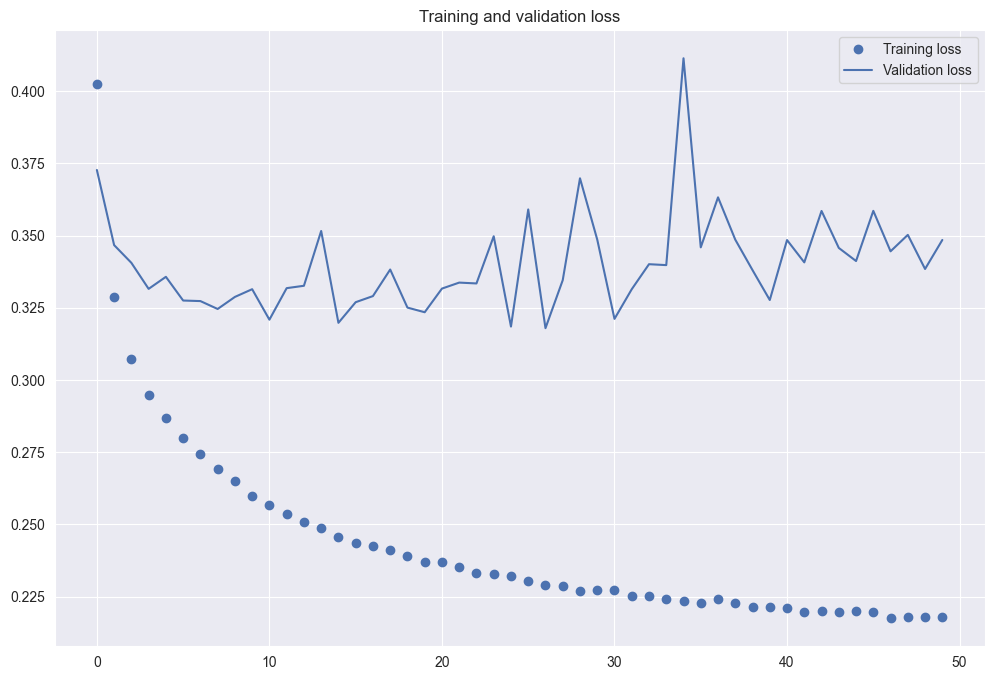

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- **Still There is an overfitting**

## **Dropout**

In [245]:
# Dropout
from keras.layers import Dropout

model_3 = Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_smote.shape[1], )))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                2560      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                

In [246]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [247]:
history = model_3.fit(X_smote, y_smote, epochs=50, batch_size=64, validation_data=(X_test_smote, y_test_smote))

Epoch 1/50
915/915 [==============================] - 11s 9ms/step - loss: 0.5311 - acc: 0.7382 - val_loss: 0.3415 - val_acc: 0.8674
Epoch 2/50
915/915 [==============================] - 7s 7ms/step - loss: 0.3707 - acc: 0.8551 - val_loss: 0.3233 - val_acc: 0.8716
Epoch 3/50
915/915 [==============================] - 6s 7ms/step - loss: 0.3402 - acc: 0.8677 - val_loss: 0.3204 - val_acc: 0.8750
Epoch 4/50
915/915 [==============================] - 7s 7ms/step - loss: 0.3263 - acc: 0.8732 - val_loss: 0.3152 - val_acc: 0.8760
Epoch 5/50
915/915 [==============================] - 7s 7ms/step - loss: 0.3173 - acc: 0.8752 - val_loss: 0.3116 - val_acc: 0.8774
Epoch 6/50
915/915 [==============================] - 7s 8ms/step - loss: 0.3131 - acc: 0.8767 - val_loss: 0.3122 - val_acc: 0.8803
Epoch 7/50
915/915 [==============================] - 7s 8ms/step - loss: 0.3064 - acc: 0.8793 - val_loss: 0.3088 - val_acc: 0.8804
Epoch 8/50
915/915 [==============================] - 7s 8ms/step - loss: 0

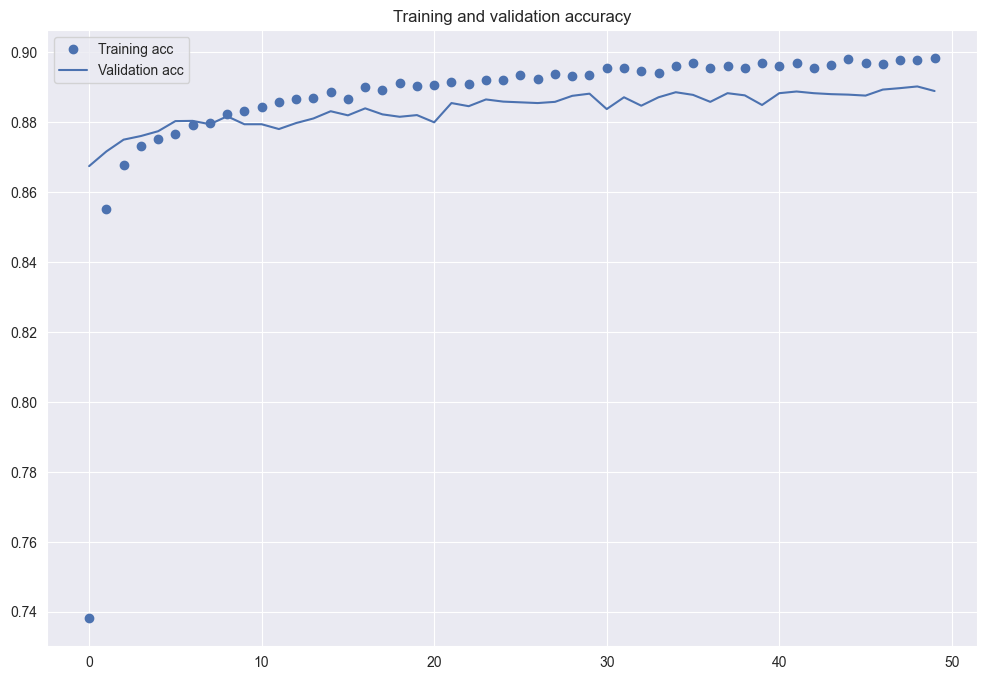

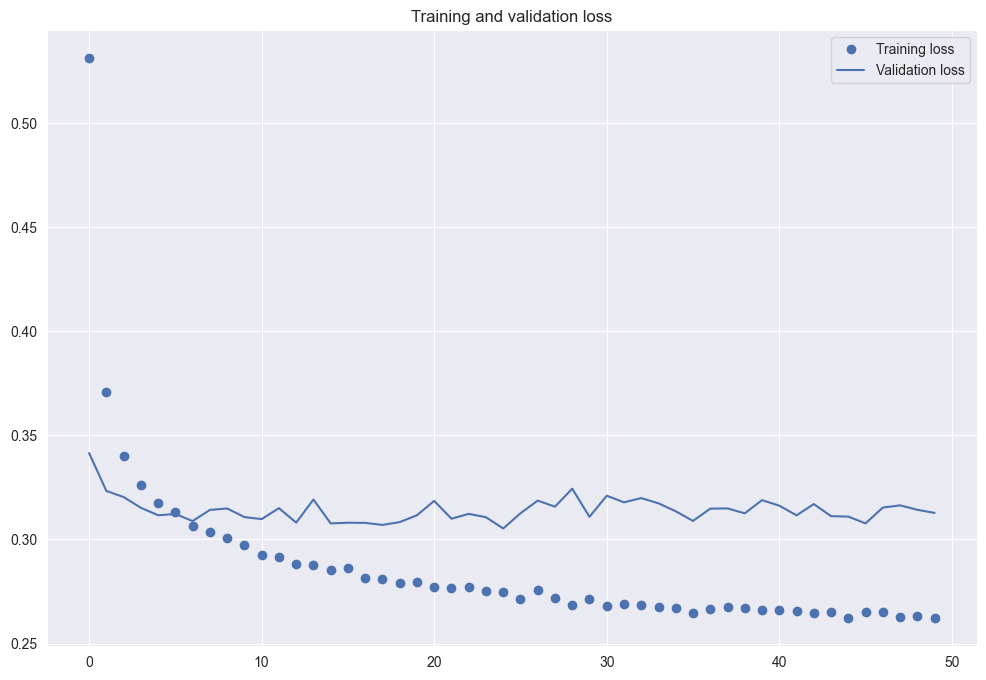

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- **somehow, It seems that we handle overfitting**

## **Reduce Complexity**

In [250]:
# model_1 "Basic Model"
model_4 = Sequential()
model_4.add(layers.Dense(32, activation='relu', input_shape=(X_smote.shape[1], )))
model_4.add(Dropout(0.5))
model_4.add(layers.Dense(16, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                1280      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


In [251]:
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [252]:
history = model_4.fit(X_smote, y_smote, epochs=50, batch_size=64, validation_data=(X_test_smote, y_test_smote))

Epoch 1/50


915/915 [==============================] - 7s 6ms/step - loss: 0.4213 - acc: 0.8109 - val_loss: 0.3270 - val_acc: 0.8685
Epoch 2/50
915/915 [==============================] - 8s 8ms/step - loss: 0.3261 - acc: 0.8684 - val_loss: 0.3182 - val_acc: 0.8734
Epoch 3/50
915/915 [==============================] - 7s 7ms/step - loss: 0.3109 - acc: 0.8741 - val_loss: 0.3203 - val_acc: 0.8748
Epoch 4/50
915/915 [==============================] - 7s 8ms/step - loss: 0.3046 - acc: 0.8766 - val_loss: 0.3117 - val_acc: 0.8740
Epoch 5/50
915/915 [==============================] - 7s 7ms/step - loss: 0.2976 - acc: 0.8805 - val_loss: 0.3087 - val_acc: 0.8764
Epoch 6/50
915/915 [==============================] - 7s 8ms/step - loss: 0.2941 - acc: 0.8811 - val_loss: 0.3164 - val_acc: 0.8769
Epoch 7/50
915/915 [==============================] - 6s 7ms/step - loss: 0.2911 - acc: 0.8825 - val_loss: 0.3055 - val_acc: 0.8789
Epoch 8/50
915/915 [==============================] - 5s 6ms/step - loss: 0.2883 - acc:

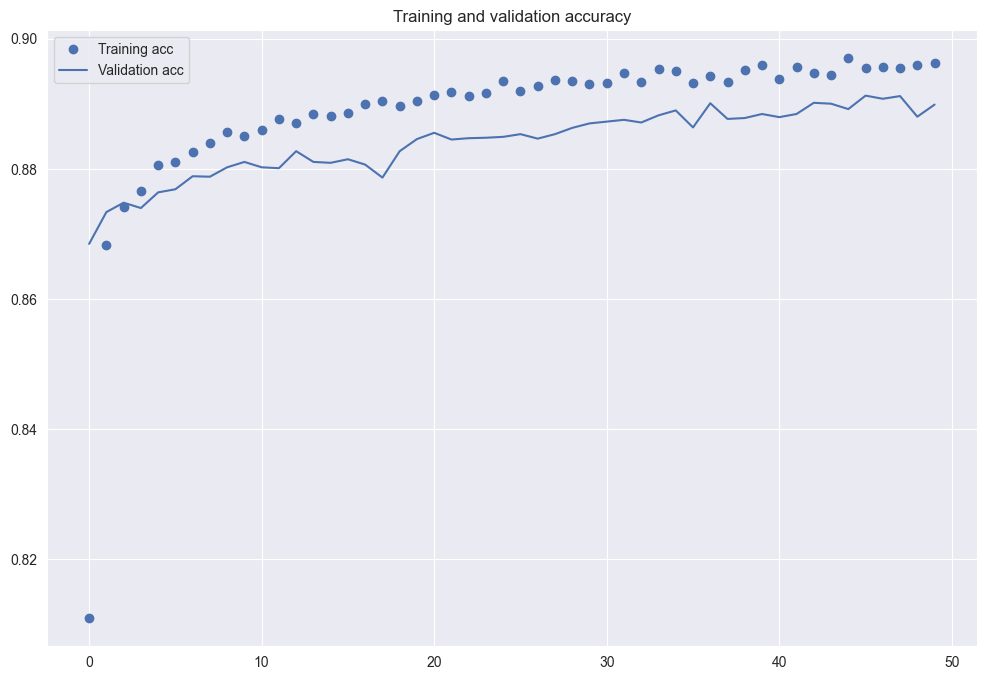

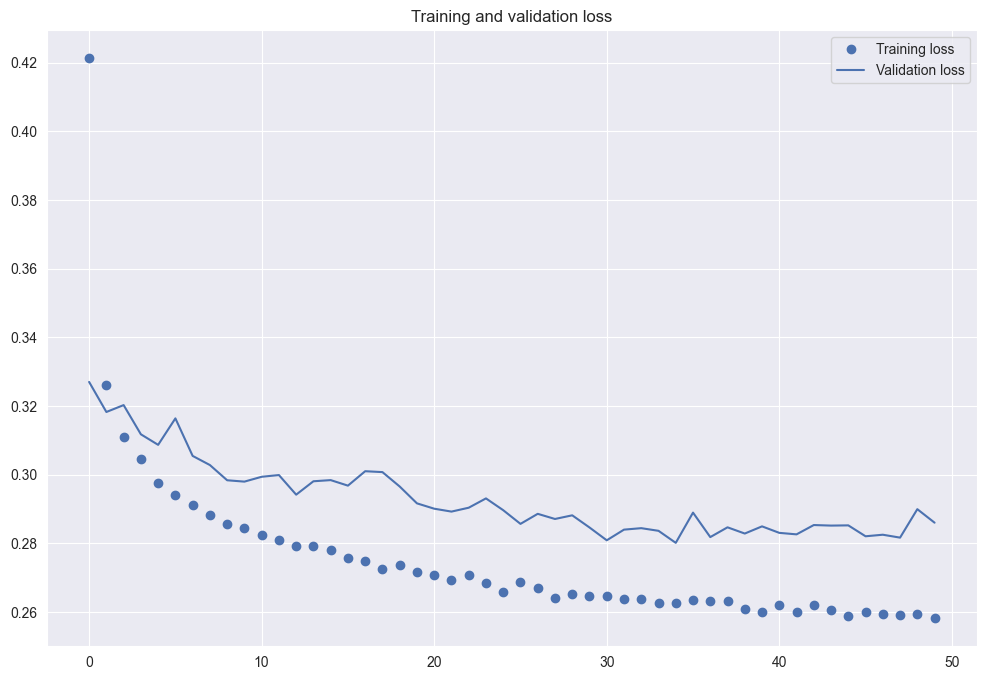

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()